<a href="https://colab.research.google.com/github/bburt26/Final-Project/blob/main/milestone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/bburt26/Final-Project.git

Cloning into 'Final-Project'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 106 (delta 41), reused 43 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (106/106), 672.37 KiB | 12.93 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [ ]:
!git config --global user.name "bburt26"
!git config --global user.email "jtg3ts@virginia.edu"

In [ ]:
%pwd

age_sex_cleaning.py  age_sex_models.py  CVD_Cleaned.csv  model_data.csv


In [ ]:
! git push origin main

fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/Final-Project/data/CVD Dataset.csv')

# Clean
columns_of_interest = ['Age', 'Sex', 'Blood Pressure Category']
data_cleaned = data[columns_of_interest].copy()
data_cleaned = data_cleaned.replace({None: np.nan, '': np.nan})

# Drop rows where Age or Blood Pressure Category are NaN
data_cleaned.dropna(subset=['Age', 'Blood Pressure Category'], inplace=True)

# Convert Age to int64
data_cleaned['Age'] = data_cleaned['Age'].astype('int64')

# ________________________________________________________________________________


# Save cleaned dataframe to CSV
data_cleaned.to_csv('CVD_Cleaned.csv', index=False)

# Encode Sex as numeric
data_cleaned['Sex'] = data_cleaned['Sex'].map({'F': 0, 'M': 1})

# Encode Blood Pressure Category as numeric
bp_map = {
    'Normal': 0,
    'Elevated': 1,
    'Hypertension Stage 1': 2,
    'Hypertension Stage 2': 3
}
data_cleaned['BP_Category_Label'] = data_cleaned['Blood Pressure Category'].map(bp_map)

# Display
print(data_cleaned.dtypes)
print(data_cleaned.describe())
print(data_cleaned.head(10))

model_data = data_cleaned.copy()
model_data.to_csv('model_data.csv', index=False)


Age                         int64
Sex                         int64
Blood Pressure Category    object
BP_Category_Label           int64
dtype: object
               Age          Sex  BP_Category_Label
count  1451.000000  1451.000000        1451.000000
mean     47.025500     0.494142           1.954514
std      12.421063     0.500138           1.126177
min      25.000000     0.000000           0.000000
25%      37.000000     0.000000           1.000000
50%      46.000000     0.000000           2.000000
75%      55.000000     1.000000           3.000000
max      79.000000     1.000000           3.000000
    Age  Sex Blood Pressure Category  BP_Category_Label
0    32    0                Elevated                  1
1    55    0    Hypertension Stage 1                  2
3    44    1    Hypertension Stage 1                  2
4    32    0    Hypertension Stage 1                  2
5    58    0    Hypertension Stage 2                  3
6    33    1                  Normal                  0

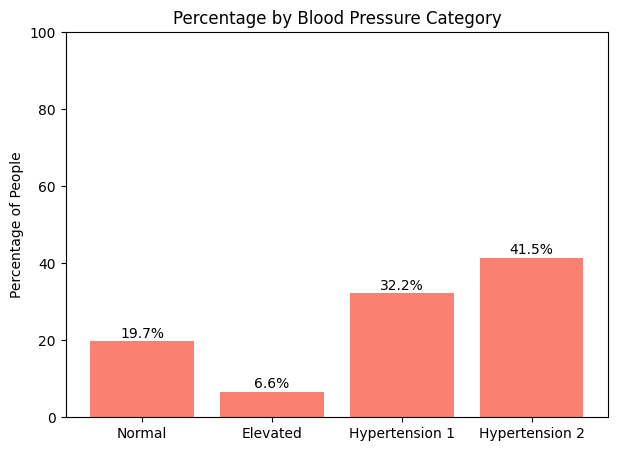

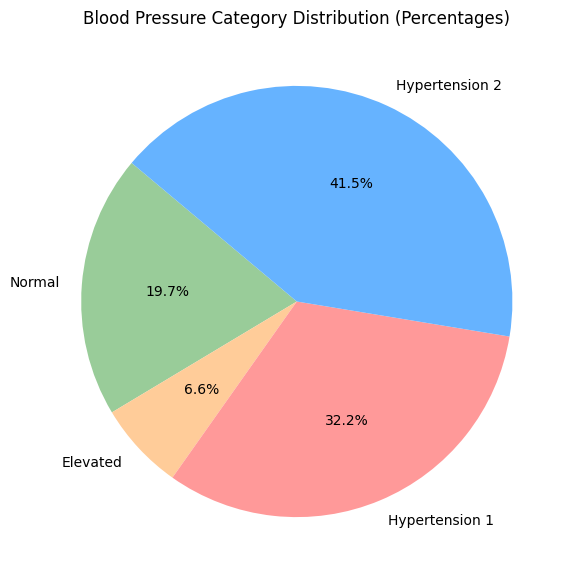

In [ ]:
import matplotlib.pyplot as plt

# Calculate normalized value counts (percentages)
bp_counts = model_data['BP_Category_Label'].value_counts(normalize=True).sort_index()
bp_labels = ['Normal', 'Elevated', 'Hypertension 1', 'Hypertension 2']
bp_percentages = bp_counts.values * 100

# Bar chart of BP category percentages
plt.figure(figsize=(7,5))
plt.bar(bp_labels, bp_percentages, color='salmon')
plt.ylabel('Percentage of People')
plt.title('Percentage by Blood Pressure Category')
plt.ylim(0, 100)
for i, v in enumerate(bp_percentages):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=10)
plt.show()

# Pie chart of BP category percentages
plt.figure(figsize=(7,7))
plt.pie(bp_percentages, labels=bp_labels, autopct='%1.1f%%', startangle=140, colors=['#99cc99','#ffcc99','#ff9999','#66b3ff'])
plt.title('Blood Pressure Category Distribution (Percentages)')
plt.show()

In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

model_data = pd.read_csv('model_data.csv')
model_data.head()


X = model_data[['Age', 'Sex']]
y = model_data['BP_Category_Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Limit the depth of the Decision Tree for better interpretability
dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report (max_depth=3):")
print(classification_report(y_test, y_pred_dt, zero_division=0))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

TEST - Hello world.